# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
from scipy.stats import t

# Leitura de dados

In [2]:
df = pd.read_excel("Base_Juridico.xlsx", sheet_name=1)
df.head()

,Sentença,Data_Julgamento,Região da Comarca,Tipo de Estratégia,Taxa Contratada,Valor Indenização
0,1,2019-07-01,Oeste,Estrategia C,3.1,0.000000
1,1,2019-07-01,Norte,Estrategia C,2.5,0.000000
2,0,2019-07-02,Sul,Estrategia A,4.0,2247.437094
3,1,2019-07-02,Sul,Estrategia B,2.6,0.000000
4,1,2019-07-03,Oeste,Estrategia B,4.1,0.000000


In [3]:
# Tipos de processos
tipos_de_processos = [
    'Trabalhistas',
    'Danos ao Consumidor',
    'Quebra de Contrato',
    'Danos Ambientais',
    'Violação de Propriedade Intelectual',
    'Responsabilidade Civil'
]

# Adicionando uma nova coluna com tipos de processos aleatórios
np.random.seed(42)
df['Tipo de Processo'] = np.random.choice(tipos_de_processos, size=len(df))

df['Sentença Final'] = np.where(df['Sentença'] == 1, 'Ganhou', 'Perdeu')

df.head()

#df.to_csv('dados_juridicos_novo.csv', index=False)

,Sentença,Data_Julgamento,Região da Comarca,Tipo de Estratégia,Taxa Contratada,Valor Indenização,Tipo de Processo,Sentença Final
0,1,2019-07-01,Oeste,Estrategia C,3.1,0.000000,Danos Ambientais,Ganhou
1,1,2019-07-01,Norte,Estrategia C,2.5,0.000000,Violação de Propriedade Intelectual,Ganhou
2,0,2019-07-02,Sul,Estrategia A,4.0,2247.437094,Quebra de Contrato,Perdeu
3,1,2019-07-02,Sul,Estrategia B,2.6,0.000000,Violação de Propriedade Intelectual,Ganhou
4,1,2019-07-03,Oeste,Estrategia B,4.1,0.000000,Violação de Propriedade Intelectual,Ganhou


In [4]:
print('Número de Linhas: ', df.shape[0])
print('Número de Colunas: ', df.shape[1])

Número de Linhas:  450
Número de Colunas:  8


In [5]:
df.dtypes

Sentença                       int64
Data_Julgamento       datetime64[ns]
Região da Comarca             object
Tipo de Estratégia            object
Taxa Contratada              float64
Valor Indenização            float64
Tipo de Processo              object
Sentença Final                object
dtype: object

# Análise Exploratória

## Sentença

In [6]:
sentenca_fa = df['Sentença'].value_counts()
sentenca_fr = (df['Sentença'].value_counts(normalize = True)*100).round(2)
sentenca_frequencia = pd.DataFrame({'Frequência Absoluta': sentenca_fa,
                                    'Frequência Relativa': sentenca_fr})
sentenca_frequencia

,Frequência Absoluta,Frequência Relativa
Sentença,,
0,250,55.56
1,200,44.44


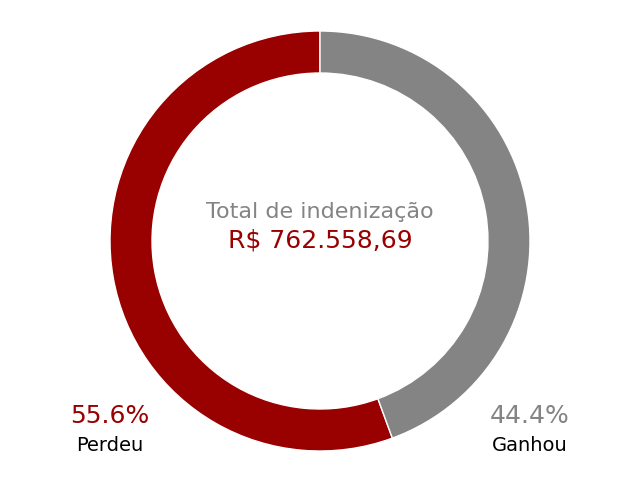

In [7]:
# Configurando o locale para o Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')



# Contagem das ocorrências de cada valor único
sentenca_counts = (df['Sentença Final'].value_counts(normalize=True) * 100).round(1)
perdeu_count = sentenca_counts['Perdeu']
ganhou_count = sentenca_counts['Ganhou']
total_indenizacao = df['Valor Indenização'].sum()

# Plotagem do gráfico de donut
plt.figure(figsize=(8, 6))
plt.pie(sentenca_counts, labels=None, autopct=None, startangle=90, colors=['#990000', '#848484'], wedgeprops=dict(width=0.2, edgecolor='w'))

# Adiciona a porcentagem e texto para "Perdeu"
plt.text(0, 0, f'Total de indenização\n', fontsize=16, color='#848484', ha='center')
plt.text(0, -0.03, f'{locale.currency(total_indenizacao, grouping=True)}', fontsize=18, color='#990000', ha='center')
plt.text(-1, -1, f'{perdeu_count}%\n', fontsize=18, color='#990000', ha='center')
plt.text(-1, -1, f'Perdeu', fontsize=14, ha='center')
plt.text(1, -1, f'{ganhou_count}%\n', fontsize=18, color='#848484', ha='center')
plt.text(1, -1, f'Ganhou', fontsize=14, ha='center')

#plt.title('Distribuição de Sentença Final')
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo.


# Salvando o gráfico como uma imagem
plt.savefig('grafico_distribuicao_sentenca_final.png', dpi=300)
plt.show()



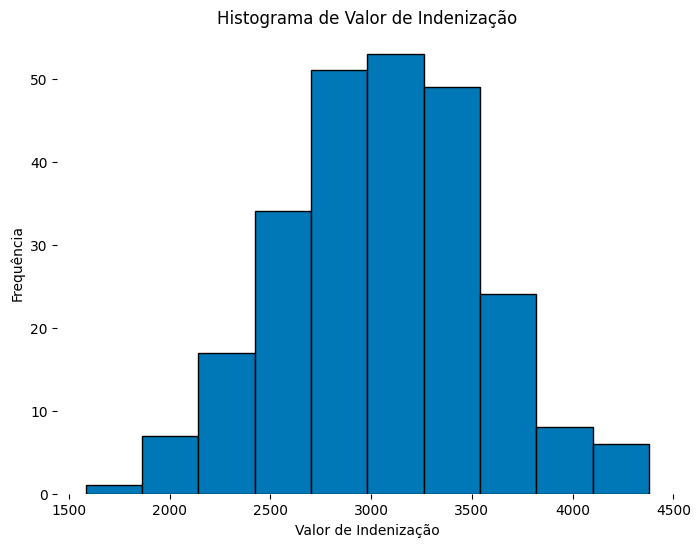

In [8]:
histograma_indenizacao = df[df['Valor Indenização'] != 0.0]

# Plotagem do histograma
plt.figure(figsize=(8, 6))
plt.hist(histograma_indenizacao['Valor Indenização'], color='#0077b6', edgecolor='black')
plt.title('Histograma de Valor de Indenização')
plt.xlabel('Valor de Indenização')
plt.ylabel('Frequência')
plt.grid(False)  # Removendo o grid
plt.box(False)   # Removendo o box
plt.savefig('histograma_indenização.png', dpi=300)
plt.show()



In [9]:
# Definir intervalos de risco
baixo_limite = 100000
moderado_limite = 150000

# Função para classificar o risco com base no valor da indenização
def classificar_risco(indenizacao):
    if indenizacao <= baixo_limite:
        return 'Baixo'
    elif indenizacao <= moderado_limite:
        return 'Moderado'
    else:
        return 'Alto'



processo_fa = df['Tipo de Processo'].value_counts()
processo_fr = (df['Tipo de Processo'].value_counts(normalize=True)*100).round(2)
processo_indenizacao = df.groupby('Tipo de Processo')['Valor Indenização'].sum()
processo_frequencia = pd.DataFrame({'Frequência Absoluta': processo_fa,
                      'Frequência Relativa': processo_fr,
                      'Valor de Indenização': processo_indenizacao})
processo_frequencia['Risco'] = processo_frequencia['Valor de Indenização'].apply(classificar_risco)
processo_frequencia['Valor de Indenização'] = processo_frequencia['Valor de Indenização'].map(locale.currency)
processo_frequencia
#processo_indenizacao

,Frequência Absoluta,Frequência Relativa,Valor de Indenização,Risco
Tipo de Processo,,,,
Danos Ambientais,90,20.00,"R$ 158147,28",Alto
Danos ao Consumidor,66,14.67,"R$ 99631,33",Baixo
Quebra de Contrato,73,16.22,"R$ 148631,23",Moderado
Responsabilidade Civil,77,17.11,"R$ 128908,60",Moderado
Trabalhistas,82,18.22,"R$ 148333,81",Moderado
Violação de Propriedade Intelectual,62,13.78,"R$ 78906,44",Baixo


In [10]:
import pandas as pd

# Dados da tabela
data = {
    'Tipo de Processo': ['Danos Ambientais', 'Danos ao Consumidor', 'Quebra de Contrato', 'Responsabilidade Civil', 'Trabalhistas', 'Violação de Propriedade Intelectual'],
    'Total (%)': [71, 97, 64, 94, 73, 51],
    'Indenização Paga': [106985.8, 165810.4, 121160.7, 156983.0, 125541.6, 86077.1]
}

# Criar DataFrame
data = pd.DataFrame(data)

# Definir intervalos de risco
baixo_limite = 100000
moderado_limite = 150000

# Função para classificar o risco com base no valor da indenização
def classificar_risco(indenizacao):
    if indenizacao <= baixo_limite:
        return 'Baixo'
    elif indenizacao <= moderado_limite:
        return 'Moderado'
    else:
        return 'Alto'

# Criar a coluna de risco
data['Risco'] = data['Indenização Paga'].apply(classificar_risco)

print(df)


     Sentença Data_Julgamento Região da Comarca Tipo de Estratégia   
0           1      2019-07-01             Oeste       Estrategia C  \
1           1      2019-07-01             Norte       Estrategia C   
2           0      2019-07-02               Sul       Estrategia A   
3           1      2019-07-02               Sul       Estrategia B   
4           1      2019-07-03             Oeste       Estrategia B   
..        ...             ...               ...                ...   
445         1      2019-12-29             Leste       Estrategia C   
446         0      2019-12-30            Centro       Estrategia C   
447         0      2019-12-30             Norte       Estrategia B   
448         0      2019-12-31             Leste       Estrategia A   
449         1      2019-12-31            Centro       Estrategia B   

     Taxa Contratada  Valor Indenização                     Tipo de Processo   
0                3.1           0.000000                     Danos Ambientais  \

## Região Comarca

Temos uma distribuição bem simetrica de dados entre as regiões

In [11]:
regiao_fa = df['Região da Comarca'].value_counts()
regiao_fr = (df['Região da Comarca'].value_counts(normalize=True)*100).round(2)
regiao_indenizacao = df.groupby('Região da Comarca')['Valor Indenização'].sum()
regiao_frequencia = pd.DataFrame({'Frequência Absoluta': regiao_fa,
                      'Frequência Relativa': regiao_fr,
                      'Valor de Indenização': regiao_indenizacao})
regiao_frequencia['Risco'] = regiao_frequencia['Valor de Indenização'].apply(classificar_risco)
regiao_frequencia['Valor de Indenização'] = regiao_frequencia['Valor de Indenização'].map(locale.currency)
regiao_frequencia

,Frequência Absoluta,Frequência Relativa,Valor de Indenização,Risco
Região da Comarca,,,,
Centro,95,21.11,"R$ 178652,31",Alto
Leste,89,19.78,"R$ 143819,55",Moderado
Norte,89,19.78,"R$ 156952,60",Alto
Oeste,84,18.67,"R$ 141400,28",Moderado
Sul,93,20.67,"R$ 141733,94",Moderado


## Tipo de Estratégia

A base de estratégia também está bem distribuida

In [12]:
estrategia_fa = df['Tipo de Estratégia'].value_counts()
estrategia_fr = (df['Tipo de Estratégia'].value_counts(normalize=True)*100).round(2)
estrategia_frequencia = pd.DataFrame({'Frequência Absoluta': estrategia_fa,
                                      'Frequencia Relativa': estrategia_fr})
estrategia_frequencia

,Frequência Absoluta,Frequencia Relativa
Tipo de Estratégia,,
Estrategia C,158,35.11
Estrategia A,157,34.89
Estrategia B,135,30.00


In [13]:
resumo_taxa_contratada = df[['Taxa Contratada']].describe()
resumo_valor_indenizado = df[df['Sentença'] == 0]['Valor Indenização'].describe()

resumo_geral = pd.concat([resumo_taxa_contratada, resumo_valor_indenizado], axis=1)
resumo_geral


,Taxa Contratada,Valor Indenização
count,450.00000,250.000000
mean,2.99600,3050.234746
std,0.79013,491.693697
min,0.30000,1582.773279
25%,2.50000,2713.353474
50%,3.00000,3066.233052
75%,3.50000,3372.296281
max,5.30000,4379.838417


### Taxa Contratada
- A média da Taxa Contratada é de 2.9%, dispersão moderada com desvio padrão de 0.79%;

- A Taxa mínima contratada é de 0.3%, enquanto a máxima é de 5.3%. Indicando uma Amplitude alta de 2.3%;

- Sendo que metade dessas taxas estão abaixo de 3.0% e a outra metade acima;

### Valor Indenização
- A média do Valor de Indenização é de `R$ 3050,523`, dispersão significativa com desvio padrão de `R$ 491,69`;

- O valor máximo de indenização é de `R$ 4379,83` enquanto o valor mínimo é de `R$ 1582,77`;

- Metas dessas indenizações tem valor abaixo de `R$ 3066,23` e a outra metade acima disso.

In [14]:
df1 = df.copy()
df1 = df1[df1['Sentença'] == 0]

# confiança
confianca = 0.95

# tamanho da amostra
n = len(df1['Valor Indenização'])

# media amostral
media_amostral = df1['Valor Indenização'].mean()

# desvio padrão
desvio_padrao = df1['Valor Indenização'].std()

# z da distribuição t-student
z = t.ppf((1+confianca) / 2, df=n-1)

# segunda parte da formula
segunda_parte = desvio_padrao / np.sqrt(n)

# intervalo 
intervalo = z * segunda_parte

# limites do intervalo
limite_superior = (media_amostral + intervalo).round(2)
limite_inferior = (media_amostral - intervalo).round(2)

# margem de erro
margem_erro = (media_amostral - limite_inferior).round(2)


print('Limite Superior: ', limite_superior)
print('Limite Inferior: ', limite_inferior)
print('Margem de Erro: ', margem_erro)


Limite Superior:  3111.48
Limite Inferior:  2988.99
Margem de Erro:  61.24


Com 95% de confiança estimasse que o valor total indenizado da população está em um intervalo entre `R$ 3111,48` e `R$ 2988,99`, com uma margem de erro de `R$ 61,24`.

# Estimando a Taxa de Ganho

## Por estratégia

In [15]:
estrategia_fa = df['Tipo de Estratégia'].value_counts()
estrategia_fr = (df['Tipo de Estratégia'].value_counts(normalize=True)*100).round(2)
taxa_de_ganho = (df.groupby('Tipo de Estratégia')['Sentença'].mean()*100).round(2)

estrategia_tx = pd.DataFrame({'Frequência Absoluta': estrategia_fa,
                                      'Frequencia Relativa': estrategia_fr,
                                      'Taxa de Ganho': taxa_de_ganho}).reset_index()
estrategia_tx.sort_values(by='Tipo de Estratégia')

,Tipo de Estratégia,Frequência Absoluta,Frequencia Relativa,Taxa de Ganho
0,Estrategia A,157,34.89,40.13
1,Estrategia B,135,30.00,53.33
2,Estrategia C,158,35.11,41.14


Baseado na amostra, a Estatégia B tem mais Taxa de ganho do que as estratégias A e C.

In [16]:
(df.groupby('Tipo de Estratégia')['Sentença'].agg('Taxa de Ganho': mean()*100).round(2)) 

SyntaxError: invalid syntax (429655630.py, line 1)

In [ ]:
import scipy.stats as stats

# Função para calcular o intervalo de confiança
def confidence_interval(data):
    mean = data.mean()
    std_error = stats.sem(data)
    # Defina o nível de confiança desejado, por exemplo, 95%
    confidence_level = 0.95
    # Use a distribuição t de Student para calcular o intervalo de confiança
    t = stats.t.ppf((1 + confidence_level) / 2, len(data) - 1)
    margin_of_error = t * std_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return (lower_bound*100).round(2), (upper_bound*100).round(2)

# Calcular o intervalo de confiança para cada grupo de 'Tipo de Estratégia'
confidence_intervals = df.groupby('Tipo de Estratégia')['Sentença'].agg(confidence_interval)

# Exibir os intervalos de confiança
print(confidence_intervals)


Tipo de Estratégia
Estrategia A    (32.38, 47.88)
Estrategia B    (44.81, 61.86)
Estrategia C     (33.38, 48.9)
Name: Sentença, dtype: object


A estratégia B tem um intervalo de confiança mais alto do que as estratégias A e C, o que sugere que a média da taxa de ganho para a estratégia B pode ser mais alta.

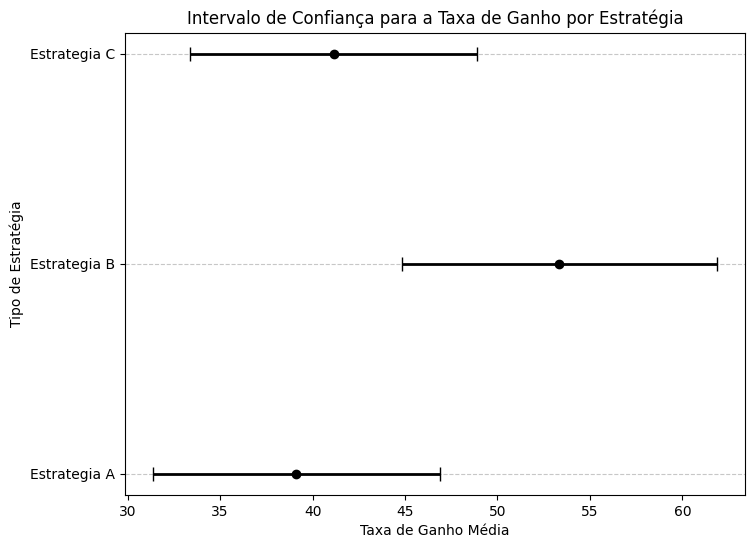

In [19]:
import matplotlib.pyplot as plt

# Dados dos intervalos de confiança
estrategias = ['Estrategia A', 'Estrategia B', 'Estrategia C']
means = [39.13, 53.34, 41.14]  # Médias das taxas de ganho
conf_ints = [(32.38, 47.88), (44.81, 61.86), (33.38, 48.9)]  # Intervalos de confiança

# Calcular o tamanho das barras de erro (meia largura do intervalo de confiança)
errors = [(conf[1] - conf[0]) / 2 for conf in conf_ints]

# Plotar apenas as barras de erro
plt.figure(figsize=(8, 6))
for i, (mean, error) in enumerate(zip(means, errors)):
    plt.errorbar(mean, i, xerr=error, fmt='o', color='black', capsize=5, elinewidth=2)

plt.xlabel('Taxa de Ganho Média')
plt.ylabel('Tipo de Estratégia')
plt.title('Intervalo de Confiança para a Taxa de Ganho por Estratégia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(len(estrategias)), estrategias)  # Definir os rótulos do eixo y
plt.show()


## Teste de Hipoteses para testar se há diferença de Taxa de Ganhos entre as estratégias

### Spoiler:
- Há evidências para rejeitar A<B

- Não há evidências para Rejeitar A=C

- Não há evidências para falar C<B

## Modelo de Regressão

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

df2 = df.drop(['Sentença Final', 'Data_Julgamento'], axis=1)
# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df2['Região da Comarca'] = le.fit_transform(df2['Região da Comarca'])
df2['Tipo de Estratégia'] = le.fit_transform(df2['Tipo de Estratégia'])
df2['Tipo de Processo'] = le.fit_transform(df2['Tipo de Processo'])

# Convertendo a coluna de data para o tipo datetime
#


# Extrair dia, mês e ano da coluna 'Data_Julgamento'
#df2['Dia'] = df2['Data_Julgamento'].dt.day
#df2['Mês'] = df2['Data_Julgamento'].dt.month
#df2['Ano'] = df2['Data_Julgamento'].dt.year

# Removendo a coluna 'Data_Julgamento'
#df.drop(columns=['Data_Julgamento'], inplace=True)

# Definindo features e target
X = df2.drop('Sentença', axis=1)
y = df2['Sentença']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculando a acurácia do modelo
accuracy = model.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 1.0


In [28]:
# Calculando as probabilidades previstas para o conjunto de teste
probabilidades = model.predict_proba(X_test)

# Exibindo as probabilidades previstas para as primeiras 5 amostras do conjunto de teste
print(probabilidades[:5].round(7))



[[1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [1.000000e-07 9.999999e-01]
 [1.000000e+00 0.000000e+00]]
